Задача 1. Почта

Почтовое отделение открывается в 08:00 и закрывается в 22:00. С 14:00 до 15:00 все сотрудники уходят на обед, а в 10:00 и 18:00 приезжают машины с посылками, и тогда все сотрудники на два часа заняты их разгрузкой. Во время обеда, разумеется, посылки никто не выдаёт, как и в моменты, когда разгружаются машины.
Напишите программу, которая получает на вход время в часах — число от 0 до 23 — и пишет, можно ли в этот час получить посылку. Используйте только один условный оператор if-else, без elif и прочего. Решите задание двумя способами: 
1.	При выполнении условия выводится сообщение: «Можно получить посылку».
2.	При выполнении условия выводится сообщение: «Посылку получить нельзя».
Обратите внимание на количество условий и постарайтесь сократить их. Не используйте перечисление конкретных часов вида a == 1 and a == 2...


In [ ]:
def post(time):
    if time in (8, 9, 12, 13, 15, 16, 17, 20, 21):
    #if time not in (8, 9, 12, 13, 15, 16, 17, 20, 21):
        print('Можно получить посылку')
    else:
        print('Посылку получить нельзя')

In [ ]:
time = int(input())
post(time)

10
Посылку получить нельзя


Задача 2. Счастливый билетик

В старину, когда даже в столице билеты в общественном транспорте выдавали контролёры, существовало поверье: если на билете сумма первых трёх цифр в номере билета равна сумме последних трёх, то это к удаче. 

Напишите программу, которая получала бы на входе шестизначный номер билета и выводила, счастливый это билет или нет. К примеру, билеты 666 666 и 252 135 — счастливые, а 123 456 — нет. Подумайте, нужны ли для решения этой задачи циклы?


In [ ]:
def sum(s):
    n = int(s)
    if n < 10 :
        return n
    return n % 10 + sum( n // 10 )

In [ ]:
tiket = input()
# print(tiket[3::])
if sum(tiket[:3:]) == sum(tiket[3::]):
    print('Билет счастливый')
else:
    print('Билет не счастливый')

012030
Билет счастливый


Задача 3.Сортировка

Пользователь вводит 1е5 чисел, не превышающие по модулю 1е9(чтение из файла). 

Напишите программу, которая проверяет, упорядочены ли они по возрастанию.

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np
import timeit

In [2]:
def sampleGen():
    max = int(1e9)
    size = int(1e5)
    # Рандомные числа
    digits = np.random.choice(max, size)
    np.save("np_save_data", digits)
    # # Всегда одно число
    # digits = np.full(size, max)
    # np.save("np_save_data", digits)
    # # Сортированный в противоположную сторону массив
    # digits = np.array([size - i for i in range(size)])
    # np.save("np_save_data", digits)

In [3]:
def heapify(arr, n, i):
      # Поиск наиманьшего среди детей и корней
      largest = i
      l = 2 * i + 1
      r = 2 * i + 2
  
      if l < n and arr[i] < arr[l]:
          largest = l
  
      if r < n and arr[largest] < arr[r]:
          largest = r
  
      # Если корень не наибольшей, поменять местами с наибольшим
      if largest != i:
          arr[i], arr[largest] = arr[largest], arr[i]
          heapify(arr, n, largest)

In [4]:
def heapSort(arr):
      n = len(arr)
  
      # Создание "кучи"
      for i in range(n//2, -1, -1):
          heapify(arr, n, i)
  
      for i in range(n-1, 0, -1):
          # Обмен местами
          arr[i], arr[0] = arr[0], arr[i]
  
          # Рассматриваем элемент
          heapify(arr, i, 0)

In [5]:
def sampleGenChaos(size):
    max = int(1e9)
    # Рандомные числа
    return np.random.choice(max, size)

In [6]:
def sampleGenConst(size):
    max = int(1e9)
    # Всегда одно число
    return np.full(size, max)

In [8]:
def sampleGenReverse(size):
    max = int(1e9)
    # Противоположно отсортированный массив
    return np.array([size - i for i in range(size)])

In [9]:
time = []
sampleGen()
digits = np.load('np_save_data.npy')
original = np.load('np_save_data.npy')
heapSort(digits)
if (list(digits) == list(original)):
    print('Sorted')
else:
    print('Unsorted')

Unsorted


In [10]:
time = [[],[],[]]
for i in range(1, int(1e5), 1000):
    digits1 = sampleGenChaos(i)
    digits2 = sampleGenConst(i)
    digits3 = sampleGenReverse(i)
    time[0].append(timeit.timeit('heapSort(digits1)', globals=globals(), number = 5))
    time[1].append(timeit.timeit('heapSort(digits2)', globals=globals(), number = 5))
    time[2].append(timeit.timeit('heapSort(digits3)', globals=globals(), number = 5))

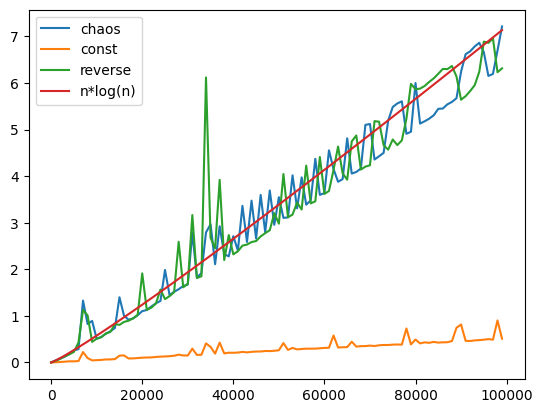

In [16]:
x = [i for i in range(1, int(1e5), 1000)]
plt.plot(x, time[0], label='chaos')
plt.plot(x, time[1], label='const')
plt.plot(x, time[2], label='reverse')
plt.plot(x, x * np.log(x) * max(time[0]) / (int(1e5) * math.log(int(1e5))) , label='n*log(n)')
plt.legend()
plt.show()

In [ ]:
print(f'Chaotic {time[0]}\n const {time[1]}\n reverse {time[2]}')

Chaotic [1.7180000213556923e-05, 0.12472604100003082, 0.121685178000007, 0.18051735200060648, 0.24564953099979903, 0.32121062700025504, 0.42464394499984337, 0.4778317820000666, 0.5392558489993462, 0.6418648770004438, 0.7169674990000203, 1.0875067550005042, 1.794988922999437, 0.9287789820000398, 1.0174174919993675, 1.1347387409996372, 1.2066377649998685, 1.3373186919998261, 1.3568646789999548, 1.459245020999333, 2.7912543769998592, 1.6281257320006262, 1.7153917629993884, 1.815913528999772, 1.8961645159997715, 2.9136797799992564, 2.201062256000114, 2.1060620680000284, 2.2277866409995113, 2.318267274000391, 3.671636500999739, 2.4967016390000936, 2.5549260460002188, 2.728428289000476, 3.5552259900005083, 2.839864208000108, 2.8791313369993077, 4.442196690999481, 3.109993488999862, 3.135088025999721, 4.697738558999845, 3.402089960000012, 3.4386548379998203, 5.036027121000188, 3.728283778000332, 3.7139923539998563, 4.5890766749998875, 3.974846322000303, 5.416077193000092, 4.109827370999483, 4

Задача 4. Кинотеатр

X мальчиков и Y девочек пошли в кинотеатр и купили билеты на идущие подряд места в одном ряду. Напишите программу, которая выдаст, как нужно сесть мальчикам и девочкам, чтобы рядом с каждым мальчиком сидела хотя бы одна девочка, а рядом с каждой девочкой — хотя бы один мальчик.

На вход подаются два числа: количество мальчиков X и количество девочек Y. В ответе выведите какую-нибудь строку, в которой будет ровно X символов B (обозначающих мальчиков) и Y символов G (обозначающих девочек), удовлетворяющую условию задачи. Пробелы между символами выводить не нужно. Если рассадить мальчиков и девочек согласно условию задачи невозможно, выведите строку «Нет решения».

Пример 1:

Введите количество мальчиков: 5

Введите количество девочек: 5

Ответ: BGBGBGBGBG

Пример 2:

Введите количество мальчиков: 5

Введите количество девочек: 3

Ответ: BGBGBBGB

Пример 3:

Введите количество мальчиков: 100

Введите количество девочек: 1

Ответ: Нет решения



In [ ]:
def seatingArrangement(x, y):
    s = ''
    if (x > 2 * y) or (y > 2 * x): # то есть даже при самой эффективной рассадки типа BGBBGB(2:1) выполонение условия не возможно
        return('Нет решения')
    if x >= y:
        k = x - y # k насколько мальчиков больше чем девочек
        for i in range(k):
            s += 'BGB' # каждая такая комбинация расходует дополнительного мальчика
        for i in range(y - k):
            s += 'BG' # на этот момент количество девочек и мальчиков сравнялось
    else:
        k = y - x
        for gbg in range(k):
            s += 'GBG'
        for gb in range(x - k):
            s += 'GB'
    return s

In [ ]:
x = 5 #int(input('Введите количество мальчиков: '))
y = 3 #int(input('Введите количество девочек: '))

seatingArrangement(x, y)

'BGBBGBBG'

Задача 5. Уникальные элементы

Даны два списка целых чисел, оба списка заполняются с клавиатуры. В первый список вводится три числа, во второй — семь чисел. Напишите программу, которая запрашивает у пользователя эти числа, затем расширяет первый список элементами второго и после этого оставляет в первом списке только уникальные элементы, то есть удаляет лишние повторы чисел. Условный оператор использовать нельзя.

Пример:
Первый список: [1, 2, 3]
Второй список: [2, 4, 6, 3, 3, 2, 1]

Новый первый список с уникальными элементами: [4, 6, 3, 2, 1]


In [ ]:
def listGen(size):
    digits = np.random.choice(10, size)
    return list(digits)

In [ ]:
def listInput(size):
    lst = []
    for i in range(size):
        element = int(input())
        # adding the element
        lst.append(element)
    return lst

In [ ]:
def listMerge(list1, list2):
    return list(set(list1 + list2))

In [ ]:
# seven = listGen(7)
# three = listGen(3)
seven = listInput(7)
three = listInput(3)

print(seven)
print(three)
print(listMerge(seven, three))

1
2
3
5
6
1
4
8
9
5
[1, 2, 3, 5, 6, 1, 4]
[8, 9, 5]
[1, 2, 3, 4, 5, 6, 8, 9]


Задача 6. Список списков

Дан вот такой (уже многомерный!) список:

nice_list = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]]

Напишите код, который «раскрывает» все вложенные списки, то есть оставляет только внешний список. Для решения используйте только list comprehensions. 

Ответ: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [ ]:
def unpack(lst):
    unpacked = []
    for i in lst:
        for j in i:
            unpacked += j
    return unpacked

In [ ]:
niceList = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[10, 11, 12], [13, 14, 15], [16, 17, 18]]]
unpack(niceList)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Задача 7. Шифр Цезаря 

Юлий Цезарь использовал свой способ шифрования текста. Каждая буква заменялась на следующую по алфавиту через K позиций по кругу. Если взять русский алфавит и k = 3, то в слове, которое мы хотим зашифровать, буква А станет буквой Г, Б станет Д и так далее.

Пользователь вводит сообщение, а также значение сдвига. Напишите программу, которая зашифрует это сообщение при помощи шифра Цезаря.

Пример:

Введите сообщение: это питон

Введите сдвиг: 3

Зашифрованное сообщение: ахс тлхср



In [ ]:
def caesar(string, k):
    k = k % 33
    for i in range(len(string)):
        j = string[i]
        if j == ' ':
            pass
        else:
            if j.isupper():
                if (ord(j) + k) <= ord('Я'):
                    new = ord(j) + k
                else:
                    new = ord('А') + ((ord(j) + k) - ord('А') + 1) % 33 
            else:
                if (ord(j) + k % 33) <= ord('я'):
                    new = ord(j) + k
                else:
                    new = ord('а') + ((ord(j) + k) - ord('а') + 1) % 33 
            print(j, ord(j) , new,  chr(new))
            string = string[:i] +  chr(new)  + string[i+1:]
    return string

In [ ]:
string = 'это питон' # input()
k = 3 # int(input())
print('Encrypted message:', caesar(string, k))

э 1101 1072 а
т 1090 1093 х
о 1086 1089 с
п 1087 1090 т
и 1080 1083 л
т 1090 1093 х
о 1086 1089 с
н 1085 1088 р
Encrypted message: ахс тлхср


Задача 8. Своя функция zip 

В самом конце собеседования вас неожиданно спросили: «Расскажите, что делает функция zip?». В итоге, чтобы произвести максимальное впечатление, вы решили не только рассказать про неё, но и написать её аналог.

Даны строка и кортеж из чисел. Напишите программу, которая создаёт генератор из пар кортежей «символ — число». Затем выведите на экран сам генератор и кортежи.

Пример:

Строка: abcd

Кортеж чисел: (10, 20, 30, 40)


Результат:

<generator object <genexpr> at 0x00000204A4234048>
    
('a', 10)
    
('b', 20)
    
('c', 30)
    
('d', 40)



In [ ]:
def zip(str, nums):
    return ((str[i], nums[i]) for i in range(len(str)))

In [ ]:
string = 'abcd'
numbers = (10, 20, 30, 40)

generator = zip(string, numbers)
print(generator)

for pair in generator:
    print(pair)

<generator object zip.<locals>.<genexpr> at 0x7ffb2c0e0dd0>
('a', 10)
('b', 20)
('c', 30)
('d', 40)


Задача 9. Протокол соревнований

В этот раз вам пришло действительно внушительное техническое задание, с описанием правил игр, входными и выходными данными. Вот как оно выглядит:

Здравствуйте! Мы собираемся устраивать соревнования по [данные засекречены] и хотим, чтобы вы написали эффективную программу, которая составляла бы нам протокол и определяла победителя и призёров. О логике работы программы ниже.

Правила соревнований:

1.	Участники имеют право играть несколько раз. Количество попыток одного участника не ограничивается. 
2.	Окончательный результат участника определяется по одной игре, лучшей для этого участника.
3.	Более высокое место в соревнованиях занимает участник, показавший лучший результат.
4.	При равенстве результатов более высокое место занимает участник, раньше показавший лучший результат.

Как проходят соревнования:

В ходе соревнований заполняется протокол, каждая строка которого описывает одну игру и содержит результат участника и его игровое имя. Протокол формируется в реальном времени по ходу проведения чемпионата, поэтому строки в нём расположены в порядке проведения игр: чем раньше встречается строка в протоколе, тем раньше закончилась соответствующая этой строке игра.
Напишите программу, которая по данным протокола определяет победителя и призёров. Гарантируется, что в чемпионате участвует не менее трёх игроков.

Описание входных данных

Первая строка содержит число N — это общее количество строк протокола. Каждая из следующих N строк содержит записанные через пробел результат участника (целое неотрицательное число) и игровое имя (имя не может содержать пробелов). Строки исходных данных соответствуют строкам протокола и расположены в том же порядке, что и в протоколе.

Гарантируется, что в соревнованиях не менее трёх участников.

Описание выходных данных

Программа должна вывести имена и результаты трёх лучших игроков по форме, приведённой ниже в примере.

Пример входных и выходных данных:

Сколько записей вносится в протокол? 9

Записи (результат и имя):

1 запись: 69485 Jack 

2 запись: 95715 qwerty 

3 запись: 95715 Alex 

4 запись: 83647 M

5 запись: 197128 qwerty 

6 запись: 95715 Jack 

7 запись: 93289 Alex 

8 запись: 95715 Alex 

9 запись: 95715 M

Итоги соревнований:

1 место. qwerty (197128)

2 место. Alex (95715)

3 место. Jack (95715)



In [ ]:

n = int(input("Сколько записей вносится в протокол? "))
results = {}

for i in range(n):
    score, name = input(f"{i + 1} запись: ").split()
    if name not in results:
        results[name] = [[],[]]
        results[name][0] = int(score)
        results[name][1] = i + 1
    else:
        if results[name][0] >= int(score):
            pass
        else:
            results[name] = [[],[]]
            results[name][0] = int(score)
            results[name][1] = i + 1

Сколько записей вносится в протокол? 9
1 запись: 69485 Jack
2 запись: 95715 qwerty
3 запись: 95715 Alex
4 запись: 83647 M
5 запись: 197128 qwerty
6 запись: 95715 Jack
7 запись: 93289 Alex
8 запись: 95715 Alex
9 запись: 95715 M


In [ ]:
print(results.items())

dict_items([('Jack', [95715, 6]), ('qwerty', [197128, 5]), ('Alex', [95715, 3]), ('M', [95715, 9])])


In [ ]:
# Сортируем результаты по убыванию и выбираем топ-3 игроков
top_players = sorted(results.items(), key=lambda x: (x[1][0], -x[1][1]), reverse=True)[:3]
print(top_players)

[('qwerty', [197128, 5]), ('Alex', [95715, 3]), ('Jack', [95715, 6])]


In [ ]:
# Выводим результаты на экран
print("Итоги соревнований:")
for i, (name, scores) in enumerate(top_players):
    print(f"{i+1} место {name} ({max(scores)})")

Итоги соревнований:
1 место qwerty (197128)
2 место Alex (95715)
3 место Jack (95715)


Задача 10. Глубокое копирование

Вы сделали для заказчика структуру сайта по продаже телефонов:

site = {

    'html': {
        'head': {
            'title': 'Куплю/продам телефон недорого'
        },
        'body': {
            'h2': 'У нас самая низкая цена на iPhone',
            'div': 'Купить',
            'p': ‘Продать'
        }
    }
}

Заказчик рассказал своим коллегам на рынке, и они тоже захотели такой сайт, только для своих товаров. Вы посчитали, что это лёгкая задача, и быстро принялись за работу. 

Напишите программу, которая запрашивает у клиента, сколько будет сайтов, а затем запрашивает название продукта и после каждого запроса выводит на экран активные сайты. 

Условия: структуру сайта нужно описать один раз, копипасту никто не любит.

Подсказка: используйте рекурсию.

Пример:

Сколько сайтов: 2

Введите название продукта для нового сайта: iPhone

Сайт для iPhone: 

site = {

    'html': {
        'head': {
            'title': 'Куплю/продам iPhone недорого'
        },
        'body': {
            'h2': 'У нас самая низкая цена на iPhone',
            'div': 'Купить',
            'p': ‘Продать'
        }
    }
}

Введите название продукта для нового сайта: Samsung

Сайт для iPhone: 

site = {

    'html': {
        'head': {
            'title': 'Куплю/продам iPhone недорого'
        },
        'body': {
            'h2': 'У нас самая низкая цена на iPhone',
            'div': 'Купить',
            'p': ‘Продать'
        }
    }
}
Сайт для Samsung: 

site = {

    'html': {
        'head': {
            'title': 'Куплю/продам Samsung недорого'
        },
        'body': {
            'h2': 'У нас самая низкая цена на Samsung,
            'div': 'Купить',
            'p': ‘Продать'
        }
    }
}


In [ ]:
def create_site(product_name):
    return {
        'html': {
            'head': {
                'title': f'Куплю/продам {product_name} недорого'
            },
            'body': {
                'h2': f'У нас самая низкая цена на {product_name}',
                'div': 'Купить',
                'p': 'Продать'
            }
        }
    }

In [ ]:
def create_sites(num_sites):
    sites = []
    for i in range(num_sites):
        product_name = input(f'Введите название продукта для нового сайта {i + 1}: ')
        site = create_site(product_name)
        print(f'Сайт для {product_name}:')
        print(site)
        sites.append(site)
    return sites

In [ ]:
num_sites = int(input('Сколько сайтов: '))
sites = create_sites(num_sites)

Сколько сайтов: 1
Введите название продукта для нового сайта 1: дыавп
Сайт для дыавп:
{'html': {'head': {'title': 'Куплю/продам дыавп недорого'}, 'body': {'h2': 'У нас самая низкая цена на дыавп', 'div': 'Купить', 'p': 'Продать'}}}
